In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3 
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings("ignore")

In [9]:
conn = sqlite3.connect("inventory.db")

# Load the correct table
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary_cleaned", conn)

# Check the data
df.head()

,VendorNumber,VendorName,Brand,Description,Volume,TotalPurchaseQuantity,ActualPrice,PurchasePrice,TotalPurchaseDollars,TotalSalesDollars,TotalSalesQuantity,AverageSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,1750.0,145080,36.99,26.27,3811251.60,5.101920e+06,142049.0,672819.31,260999.20,68601.68,-2520583.69,-49.404615,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,1750.0,164038,28.99,23.19,3804041.22,4.819073e+06,160247.0,561512.37,294438.66,144929.24,-2789008.95,-57.874381,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,1750.0,187407,24.99,18.24,3418303.68,4.538121e+06,187140.0,461140.15,343854.07,123780.22,-2298486.76,-50.648428,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,1750.0,201682,22.99,16.17,3261197.94,4.475973e+06,200412.0,420050.01,368242.80,257032.07,-2046423.00,-45.720183,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,1750.0,138109,29.99,21.89,3023206.01,4.223108e+06,135838.0,545778.28,249587.83,257032.07,-1823304.40,-43.174472,0.983556,1.396897


In [5]:
!pip install scipy


   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   --- ------------------------------------ 3.1/38.6 MB 15.3 MB/s eta 0:00:03
   ------- -------------------------------- 7.6/38.6 MB 19.6 MB/s eta 0:00:02
   ------------ --------------------------- 11.8/38.6 MB 19.9 MB/s eta 0:00:02
   ---------------- ----------------------- 16.3/38.6 MB 20.1 MB/s eta 0:00:02
   --------------------- ------------------ 20.4/38.6 MB 19.9 MB/s eta 0:00:01
   ------------------------- -------------- 24.4/38.6 MB 20.0 MB/s eta 0:00:01
   ----------------------------- ---------- 28.8/38.6 MB 20.1 MB/s eta 0:00:01
   ---------------------------------- ----- 33.3/38.6 MB 20.1 MB/s eta 0:00:01
   -------------------------------------- - 37.5/38.6 MB 20.2 MB/s eta 0:00:01
   ---------------------------------------- 38.6/38.6 MB 19.3 MB/s eta 0:00:00


In [8]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('inventory.db')

# Check available tables
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in database:", tables)


Tables in database: [('.ipynb_checkpo',), ('begin_inventory',), ('end_inventory',), ('purchases',), ('purchase_prices',), ('sales',), ('vendor_sales_summary_cleaned',)]


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
AverageSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


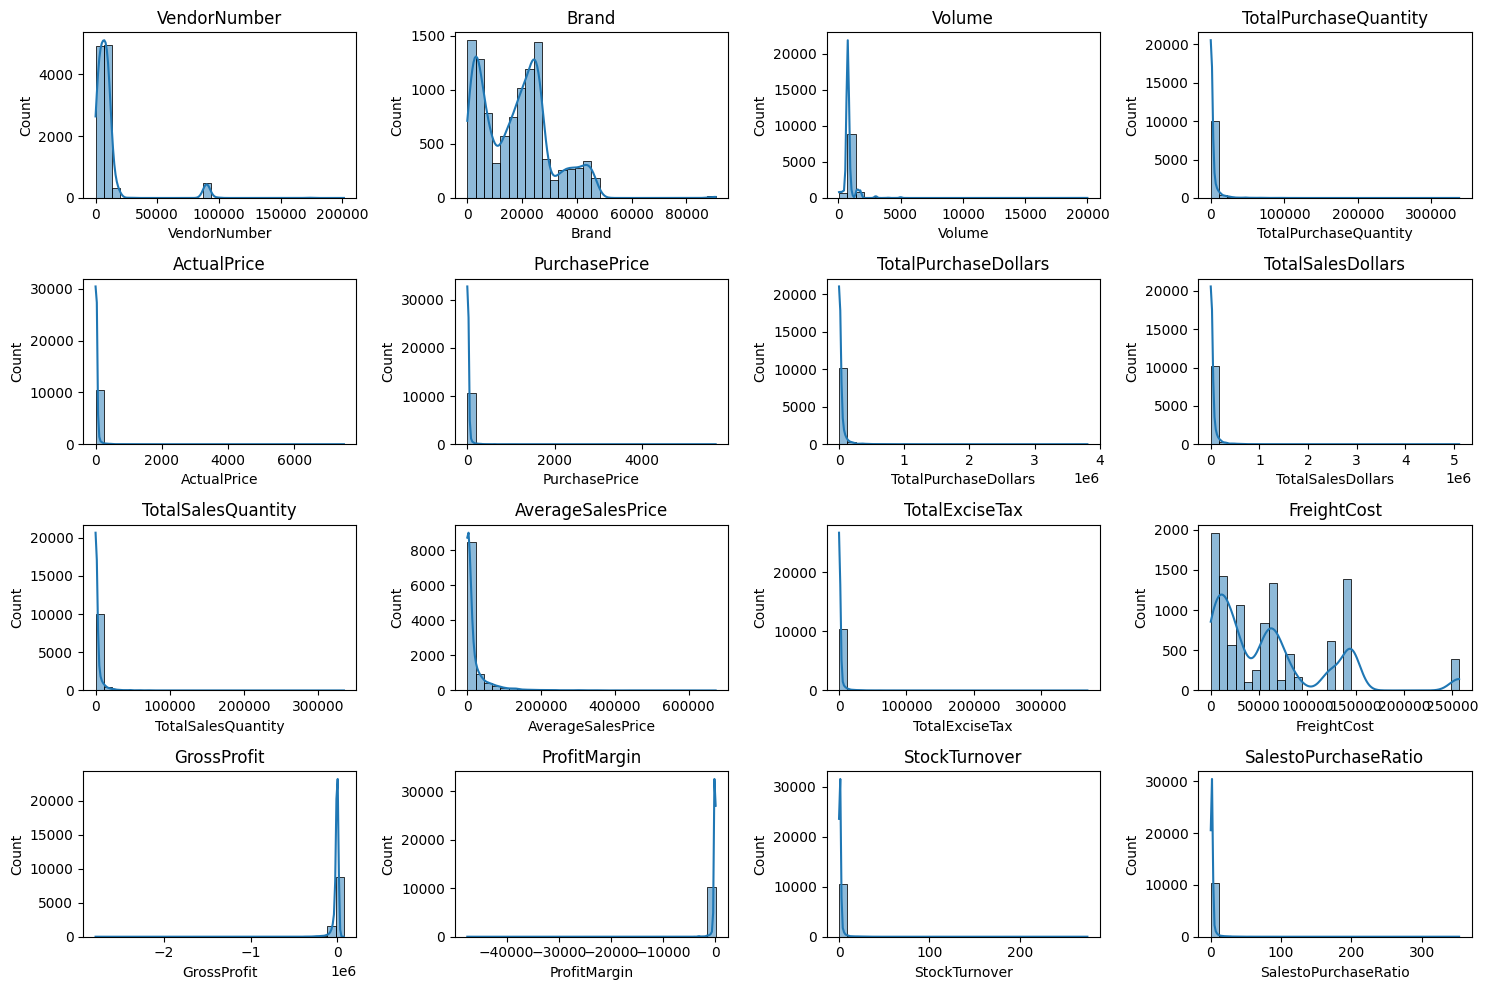

In [12]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

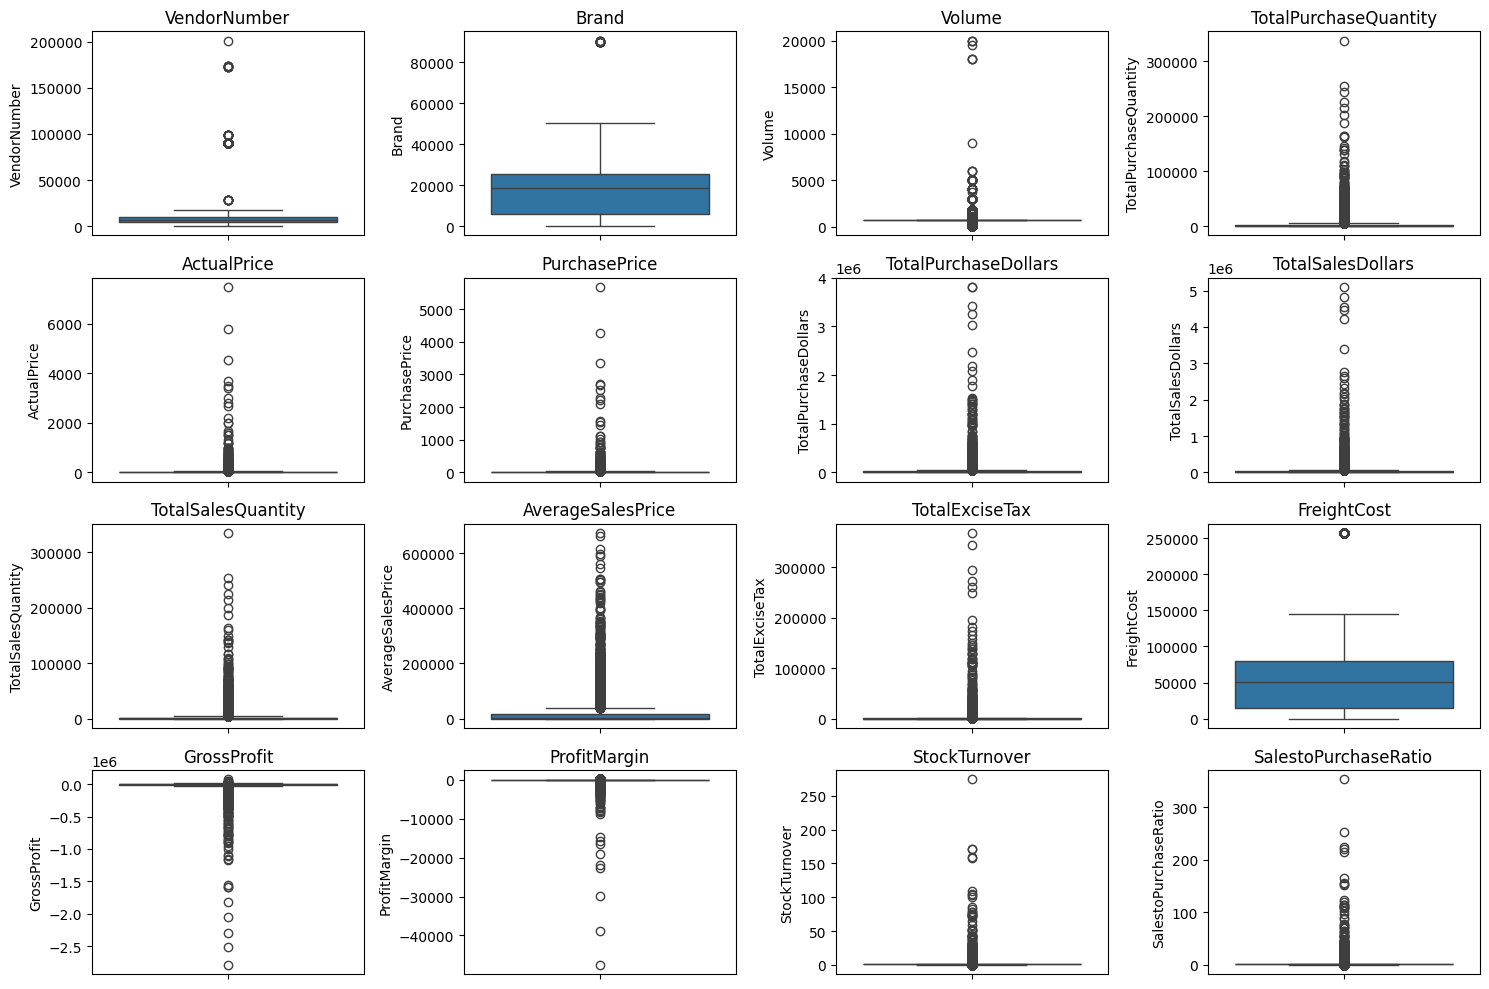

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [18]:
df = pd.read_sql_query("""SELECT * 
        FROM vendor_sales_summary_cleaned
        WHERE GrossProfit> 0
        AND ProfitMargin > 0
        AND TotalSalesQuantity> 0""", conn)

In [16]:
df

,VendorNumber,VendorName,Brand,Description,Volume,TotalPurchaseQuantity,ActualPrice,PurchasePrice,TotalPurchaseDollars,TotalSalesDollars,TotalSalesQuantity,AverageSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,4425,MARTIGNETTI COMPANIES,6983,J Lohr Seven Oaks Cab Svgn,750.0,23576,11.99,8.27,194973.52,408147.97,25703.0,131706.89,2876.24,144929.24,18200.93,4.459395,1.090219,2.093351
1,7153,PINE STATE TRADING CO,44228,Clean Slate Rsl Mosel,750.0,14627,10.99,5.59,81764.93,166518.57,15718.0,69639.55,1753.65,15884.82,2988.71,1.794821,1.074588,2.036552
2,1392,CONSTELLATION BRANDS INC,6599,Estancia Cab Svgn Paso Roble,750.0,13931,12.99,5.78,80521.18,162703.12,13838.0,66119.77,1545.28,79528.99,1660.76,1.020730,0.993324,2.020625
3,1392,CONSTELLATION BRANDS INC,15229,The Prisoner Red Napa Valley,750.0,2937,40.99,26.11,76685.07,177568.56,4144.0,92483.46,460.87,79528.99,24198.42,13.627649,1.410964,2.315556
4,4425,MARTIGNETTI COMPANIES,24786,Opus One 12,750.0,437,245.99,159.73,69802.01,158963.61,639.0,43040.27,71.77,144929.24,19359.59,12.178630,1.462243,2.277350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,50.0,2,1.99,1.42,2.84,27.86,14.0,5.97,0.73,257032.07,22.18,79.612347,7.000000,9.809859
1772,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,750.0,2,4.99,1.32,2.64,15.95,5.0,10.96,0.55,27100.41,10.67,66.896552,2.500000,6.041667
1773,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,50.0,6,0.49,0.39,2.34,65.66,134.0,1.47,7.04,50293.62,60.98,92.872373,22.333333,28.059829
1774,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,200.0,1,1.99,1.47,1.47,143.28,72.0,77.61,15.12,257032.07,140.34,97.948074,72.000000,97.469388


In [19]:
pd.read_sql_query("SELECT COUNT(*) FROM vendor_sales_summary_cleaned", conn)


,COUNT(*)
0,10692


In [20]:
pd.read_sql_query("SELECT COUNT(*) FROM vendor_sales_summary_cleaned WHERE GrossProfit > 0", conn)


,COUNT(*)
0,1776


In [21]:
pd.read_sql_query("""
SELECT COUNT(*) 
FROM vendor_sales_summary_cleaned 
WHERE GrossProfit > 0 AND ProfitMargin > 0
""", conn)


,COUNT(*)
0,1776


In [22]:
pd.read_sql_query("""
SELECT COUNT(*) 
FROM vendor_sales_summary_cleaned 
WHERE GrossProfit > 0 AND ProfitMargin > 0 AND TotalSalesQuantity > 0
""", conn)


,COUNT(*)
0,1776


In [23]:
pd.read_sql_query("SELECT COUNT(*) FROM vendor_sales_summary_cleaned WHERE GrossProfit <= 0", conn)


,COUNT(*)
0,8916


In [24]:
pd.read_sql_query("SELECT COUNT(*) FROM vendor_sales_summary_cleaned WHERE ProfitMargin <= 0", conn)


,COUNT(*)
0,8916


In [25]:
pd.read_sql_query("SELECT COUNT(*) FROM vendor_sales_summary_cleaned WHERE TotalSalesQuantity <= 0 OR TotalSalesQuantity IS NULL", conn)


,COUNT(*)
0,178


In [26]:
df = pd.read_sql_query("""
SELECT * 
FROM vendor_sales_summary_cleaned
WHERE TotalSalesQuantity > 0
""", conn)


In [27]:
df

,VendorNumber,VendorName,Brand,Description,Volume,TotalPurchaseQuantity,ActualPrice,PurchasePrice,TotalPurchaseDollars,TotalSalesDollars,TotalSalesQuantity,AverageSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,1750.0,145080,36.99,26.27,3811251.60,5.101920e+06,142049.0,672819.31,260999.20,68601.68,-2520583.69,-49.404615,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,1750.0,164038,28.99,23.19,3804041.22,4.819073e+06,160247.0,561512.37,294438.66,144929.24,-2789008.95,-57.874381,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,1750.0,187407,24.99,18.24,3418303.68,4.538121e+06,187140.0,461140.15,343854.07,123780.22,-2298486.76,-50.648428,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,1750.0,201682,22.99,16.17,3261197.94,4.475973e+06,200412.0,420050.01,368242.80,257032.07,-2046423.00,-45.720183,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,1750.0,138109,29.99,21.89,3023206.01,4.223108e+06,135838.0,545778.28,249587.83,257032.07,-1823304.40,-43.174472,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10509,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,750.0,2,4.99,1.32,2.64,1.595000e+01,5.0,10.96,0.55,27100.41,10.67,66.896552,2.500000,6.041667
10510,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,50.0,6,0.49,0.39,2.34,6.566000e+01,134.0,1.47,7.04,50293.62,60.98,92.872373,22.333333,28.059829
10511,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,50.0,2,0.99,0.74,1.48,1.980000e+00,2.0,0.99,0.10,14069.87,-0.98,-49.494949,1.000000,1.337838
10512,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,200.0,1,1.99,1.47,1.47,1.432800e+02,72.0,77.61,15.12,257032.07,140.34,97.948074,72.000000,97.469388


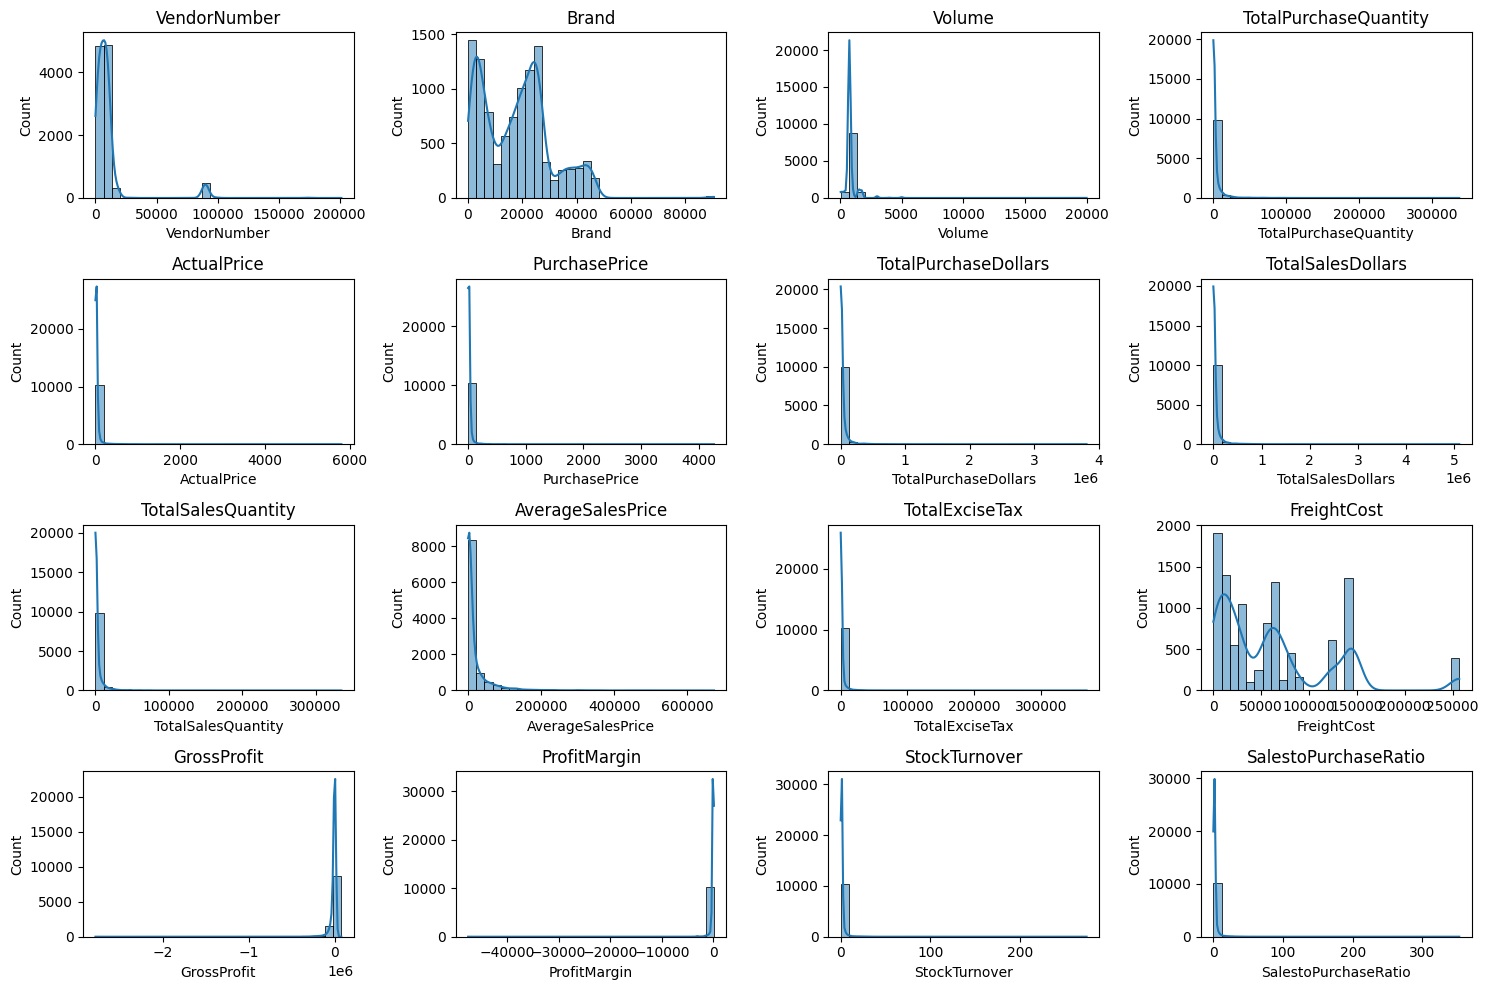

In [28]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

In [29]:
print(df['ProfitMargin'].describe())
print(df['ProfitMargin'].sort_values().head(10))  # Check lowest
print(df['ProfitMargin'].sort_values(ascending=False).head(10))  # Check highest


count    10514.000000
mean      -131.770454
std        894.579763
min     -47561.277906
25%        -69.292323
50%        -38.443249
75%        -19.578065
max         99.433313
Name: ProfitMargin, dtype: float64
3972   -47561.277906
2147   -38857.194293
5197   -29905.779918
2461   -22645.368827
5184   -22009.326845
6450   -19111.006879
3668   -16543.081057
4743   -15690.827261
4639   -14802.862858
6456    -8881.283108
Name: ProfitMargin, dtype: float64
10473    99.433313
10465    99.209468
10390    99.106493
10453    99.089688
10384    99.068453
10475    98.787327
10362    98.722699
10463    98.696711
10394    98.686546
10118    98.367127
Name: ProfitMargin, dtype: float64


In [32]:
df['Profit'] = df['TotalSalesDollars'] - df['TotalPurchaseDollars']
df['ProfitMargin'] = (df['Profit'] / df['TotalSalesDollars']) * 100


In [31]:
print(df.columns.tolist())


['VendorNumber', 'VendorName', 'Brand', 'Description', 'Volume', 'TotalPurchaseQuantity', 'ActualPrice', 'PurchasePrice', 'TotalPurchaseDollars', 'TotalSalesDollars', 'TotalSalesQuantity', 'AverageSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit', 'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio']


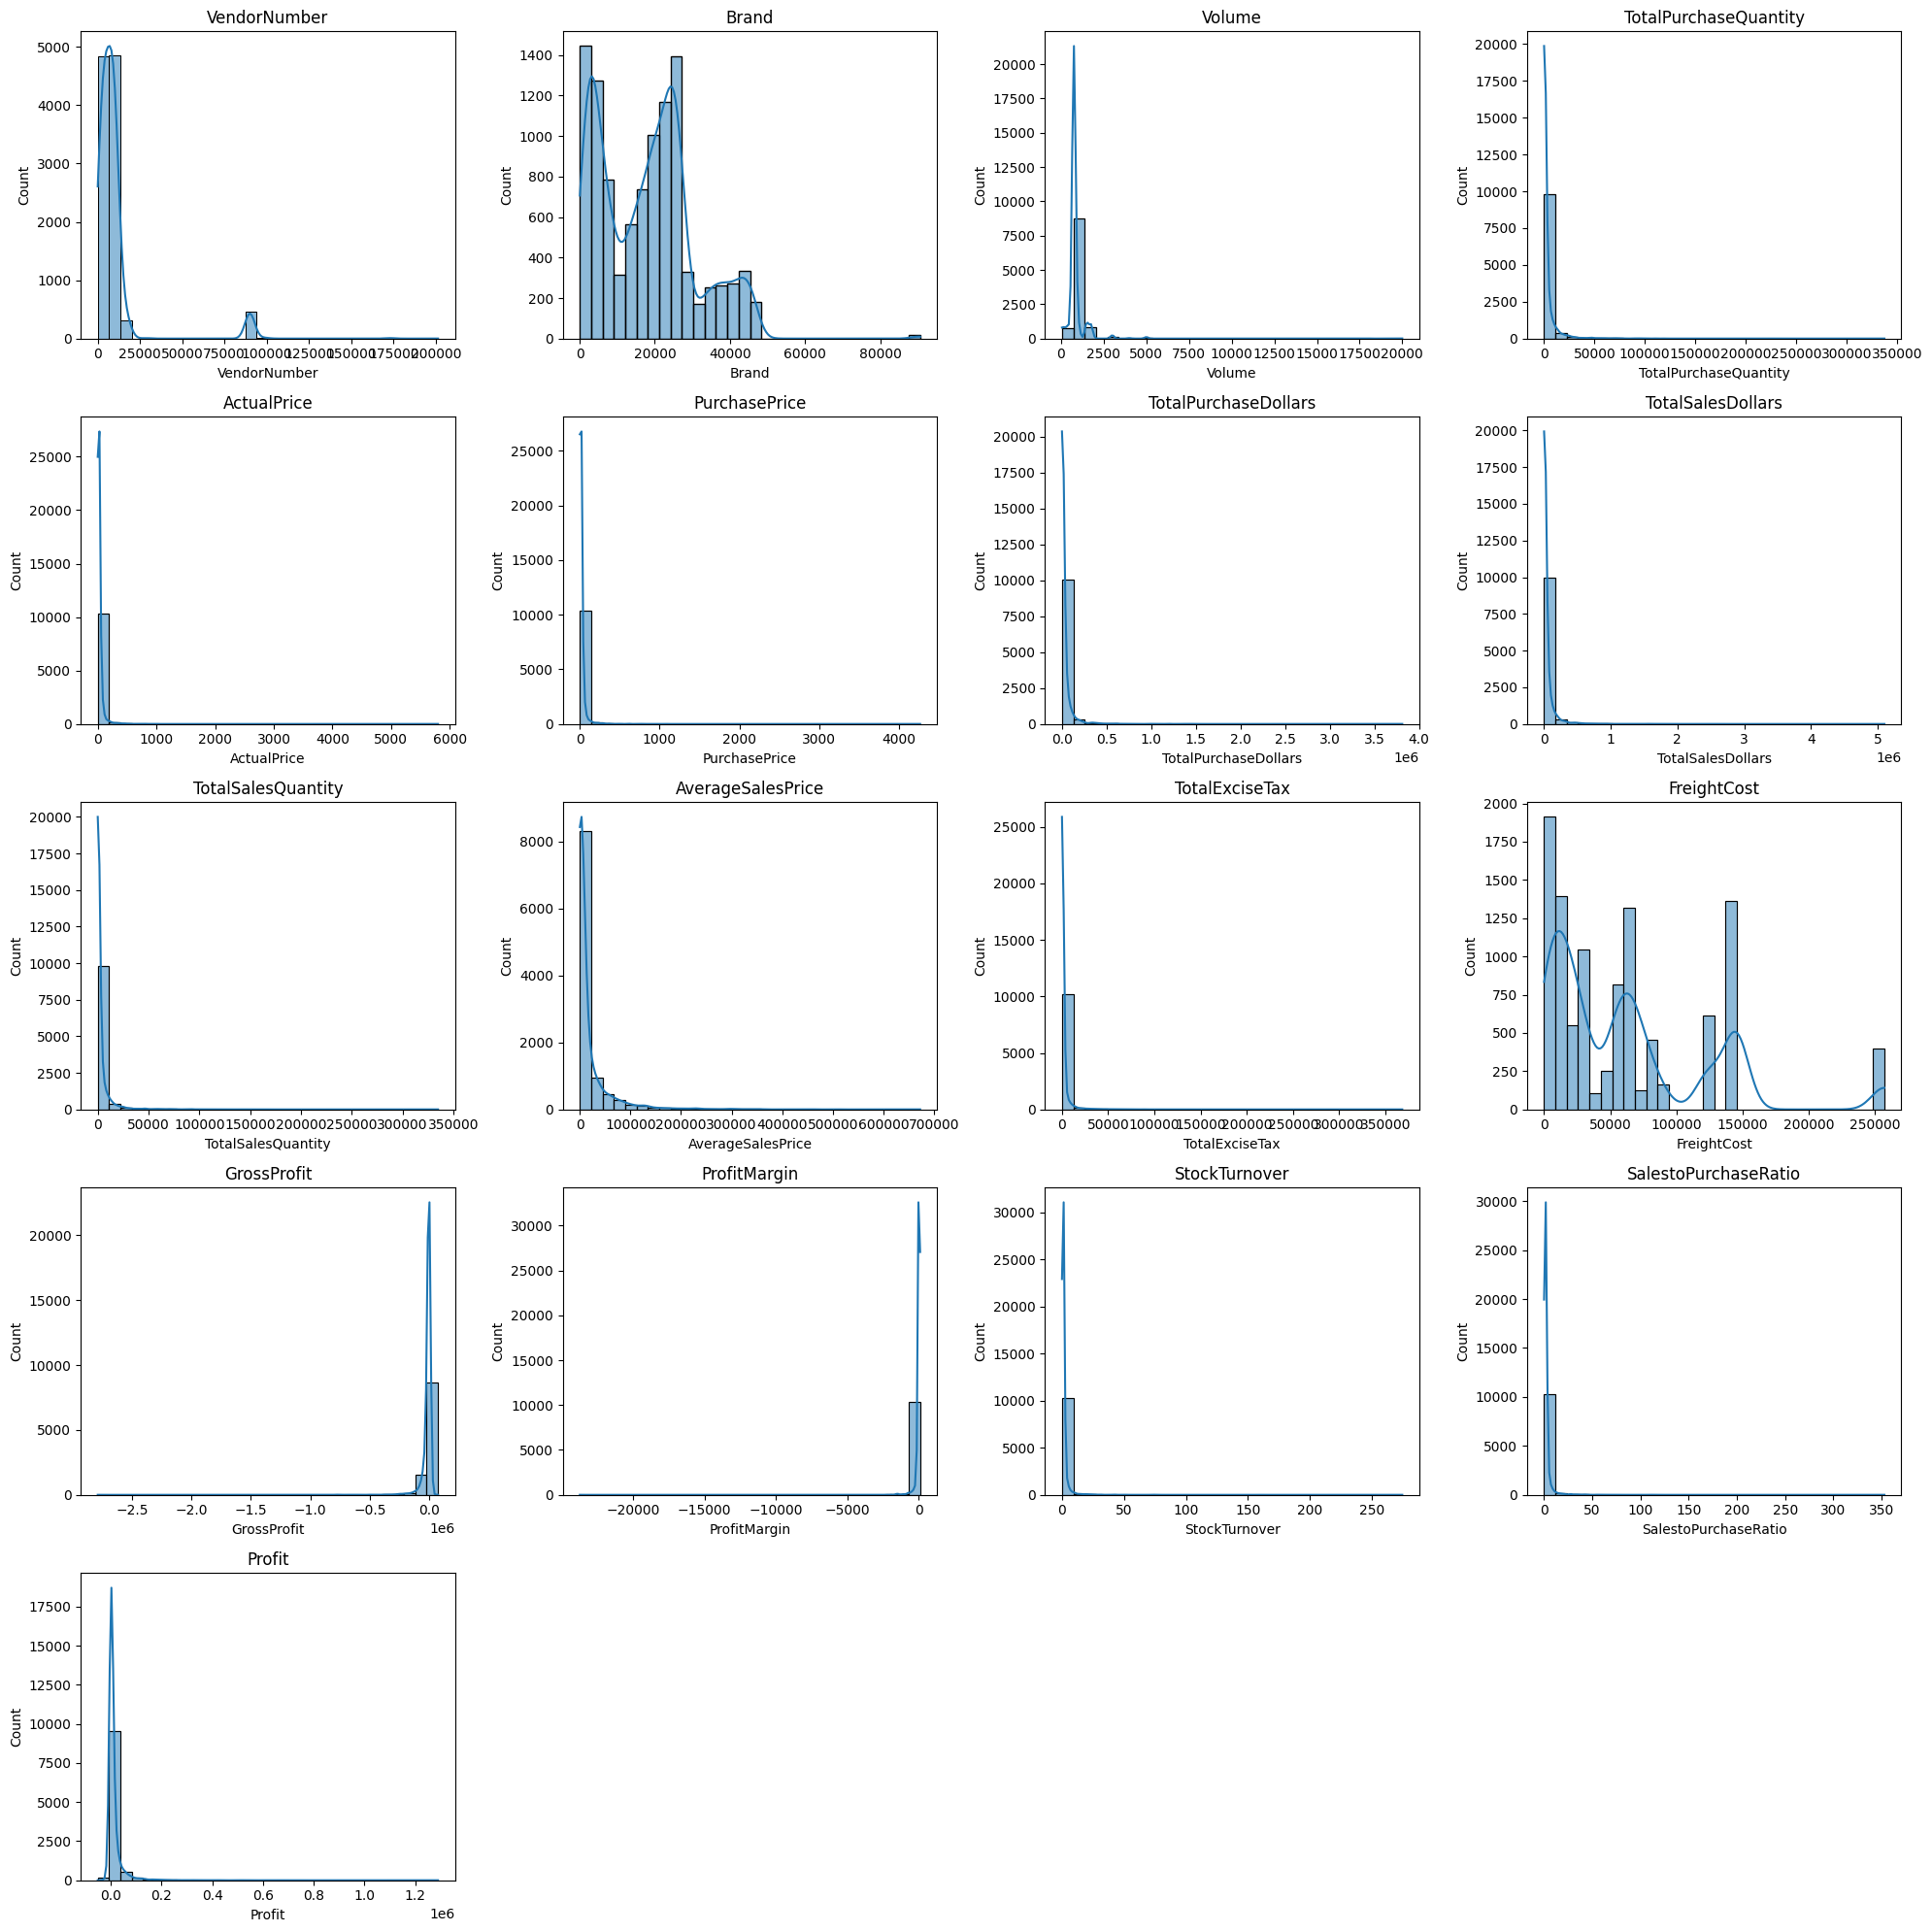

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = len(numeric_columns)

# Calculate number of rows and columns for subplots
n_cols = 4  # you can adjust this
n_rows = math.ceil(num_cols / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    plt.tight_layout()

plt.show()


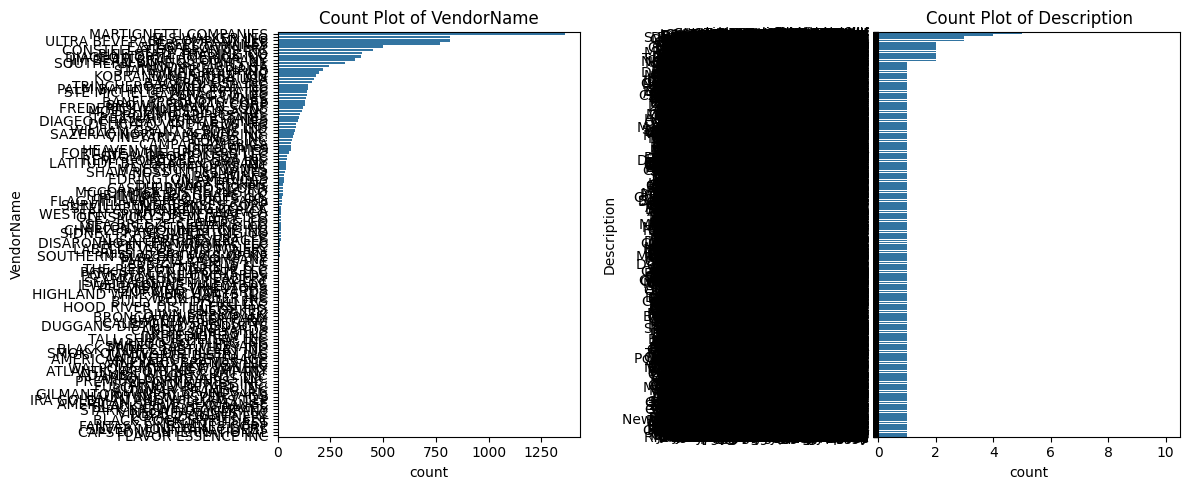

In [35]:
categorical_columns = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, 2, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

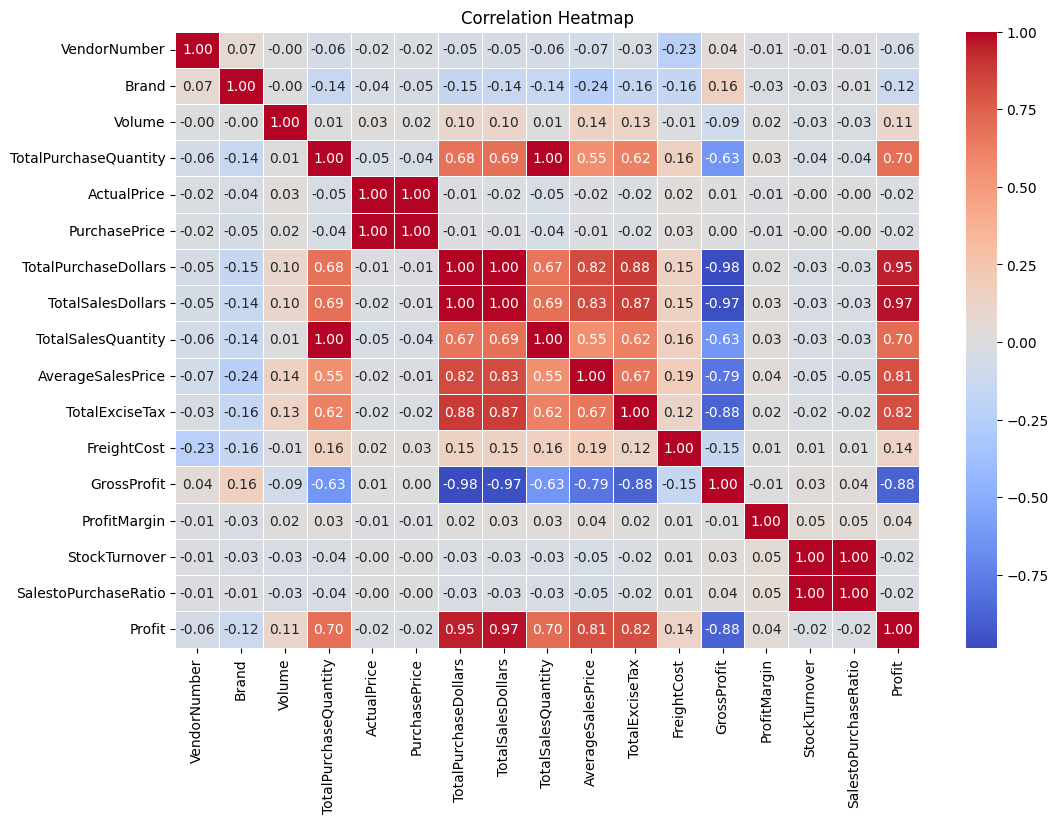

In [36]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

NOW identifing brands that needs Promotional or pricing adjustment which exhibit lower sales performance but higher profit margins

In [39]:
brand_performace = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean',}).reset_index()

In [41]:
low_sales_threshold = brand_performace['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performace['ProfitMargin'].quantile(0.85)

In [42]:
low_sales_threshold

np.float64(341.84000000000003)

In [43]:
high_margin_threshold

np.float64(56.6183663007844)

In [44]:
target_brands = brand_performace[
    (brand_performace['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performace['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with low sales but high profit margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margins:


,Description,TotalSalesDollars,ProfitMargin
7642,Santa Rita Organic Svgn Bl,9.99,66.466466
2848,Debauchery Pnt Nr,11.58,65.975820
2497,Concannon Glen Ellen Wh Zin,15.95,83.448276
2633,Crown Royal Apple,27.86,89.806174
7683,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
246,Alta Classe Mntplcno Abruzzo,327.59,60.731402
2032,Ch Musar Hochar Red,329.89,81.448362
1936,Ch La Dom St Emil Gr Cru 09,334.95,73.333333
6011,Mimosa by St Clair Winery,335.76,67.333810


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'sales', 'profit' columns are present
df = df[df['sales'] > 10]  # filter out invalid sales
df['profit_margin'] = (df['profit'] / df['sales']) * 100

# Thresholds
low_sales_threshold = 10000
high_margin_threshold = 65

# Identify target brands
target_brands = df[(df['sales'] < low_sales_threshold) & (df['profit_margin'] > high_margin_threshold)]

# Plot
plt.figure(figsize=(10,6))
plt.scatter(df['sales'], df['profit_margin'], color='blue', alpha=0.4, label='All Brands')
plt.scatter(target_brands['sales'], target_brands['profit_margin'], color='red', label='Target Brands')

plt.axvline(low_sales_threshold, color='black', linestyle='--', label='Low Sales Threshold')
plt.axhline(high_margin_threshold, color='black', linestyle='--', label='High Margin Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Brands for Promotional or Pricing Adjustments')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'sales'

In [49]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'
}).reset_index()


In [50]:
high_margin_threshold = 30
low_sales_threshold = 10000

target_brands = brand_performance[
    (brand_performance['ProfitMargin'] > high_margin_threshold) &
    (brand_performance['TotalSalesDollars'] < low_sales_threshold)
]


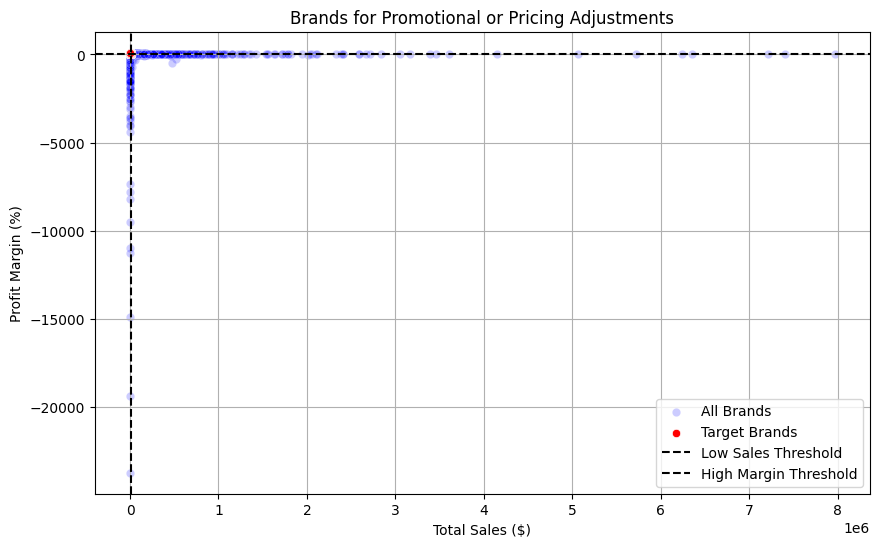

In [51]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axvline(x=low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")
plt.axhline(y=high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


In [54]:
print(df.columns.tolist())


['VendorNumber', 'VendorName', 'Brand', 'Description', 'Volume', 'TotalPurchaseQuantity', 'ActualPrice', 'PurchasePrice', 'TotalPurchaseDollars', 'TotalSalesDollars', 'TotalSalesQuantity', 'AverageSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit', 'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio', 'Profit']


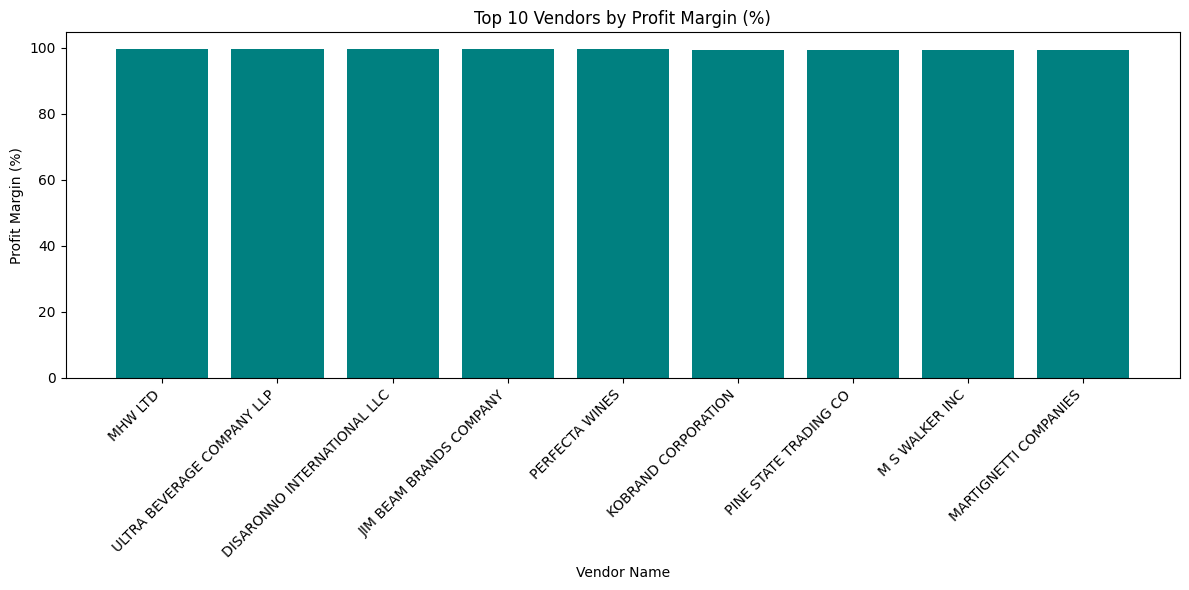

In [55]:
import matplotlib.pyplot as plt

# Filter records with valid sales
df = df[df['TotalSalesDollars'] > 10]

# Calculate profit margin as a percentage
df['profit_margin'] = (df['Profit'] / df['TotalSalesDollars']) * 100

# Plot top 10 vendors by profit margin
top_vendors = df.sort_values(by='profit_margin', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_vendors['VendorName'], top_vendors['profit_margin'], color='teal')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Vendors by Profit Margin (%)')
plt.xlabel('Vendor Name')
plt.ylabel('Profit Margin (%)')
plt.tight_layout()
plt.show()


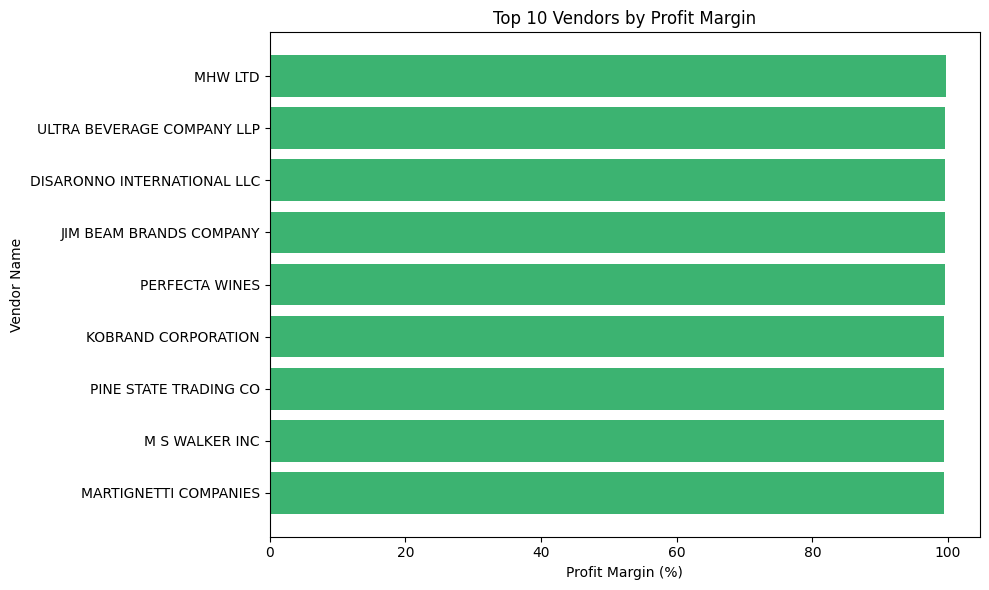

In [57]:
import matplotlib.pyplot as plt

# Filter records with valid sales
df = df[df['TotalSalesDollars'] > 10]

# Calculate profit margin as a percentage
df['profit_margin'] = (df['Profit'] / df['TotalSalesDollars']) * 100

# Sort top 10 vendors by profit margin
top_vendors = df.sort_values(by='profit_margin', ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_vendors['VendorName'], top_vendors['profit_margin'], color='mediumseagreen')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Vendor Name')
plt.title('Top 10 Vendors by Profit Margin')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()


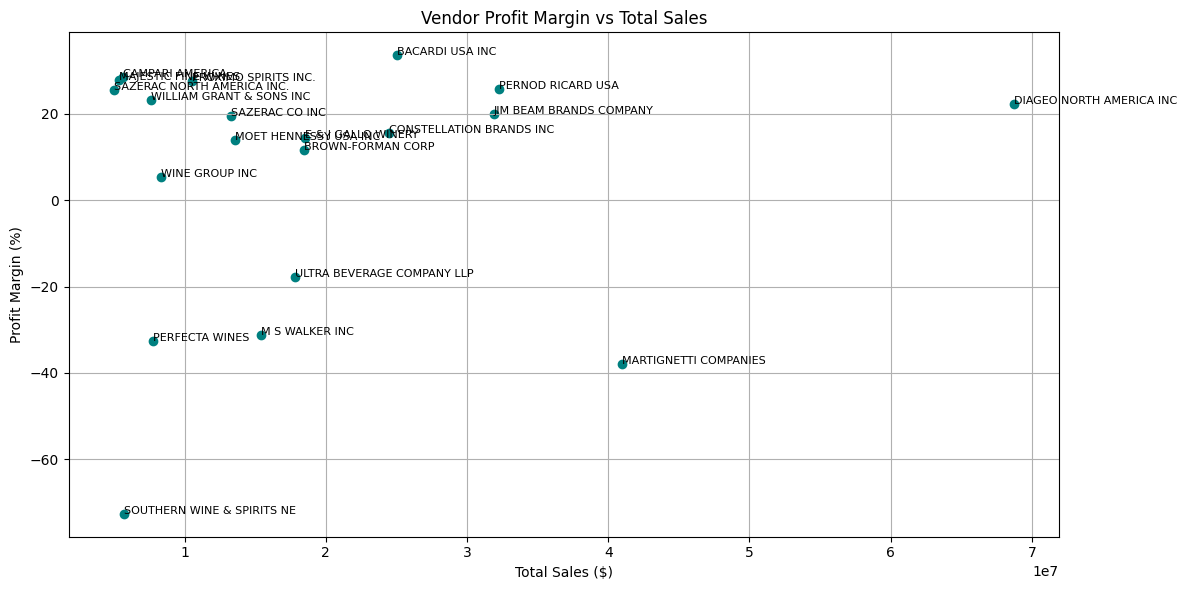

In [58]:
import matplotlib.pyplot as plt

# Clean and prepare the data
df = df[df['TotalSalesDollars'] > 10]
df['profit_margin'] = (df['Profit'] / df['TotalSalesDollars']) * 100

# Group by Vendor and aggregate total sales and average profit margin
vendor_summary = df.groupby('VendorName').agg({
    'TotalSalesDollars': 'sum',
    'profit_margin': 'mean'
}).reset_index()

# Optional: filter top 20 vendors by total sales
top_vendors = vendor_summary.sort_values(by='TotalSalesDollars', ascending=False).head(20)

# Create scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(top_vendors['TotalSalesDollars'], top_vendors['profit_margin'], color='teal')

# Add labels for each point
for i, row in top_vendors.iterrows():
    plt.text(row['TotalSalesDollars'] + 1000, row['profit_margin'], row['VendorName'], fontsize=8)

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Vendor Profit Margin vs Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


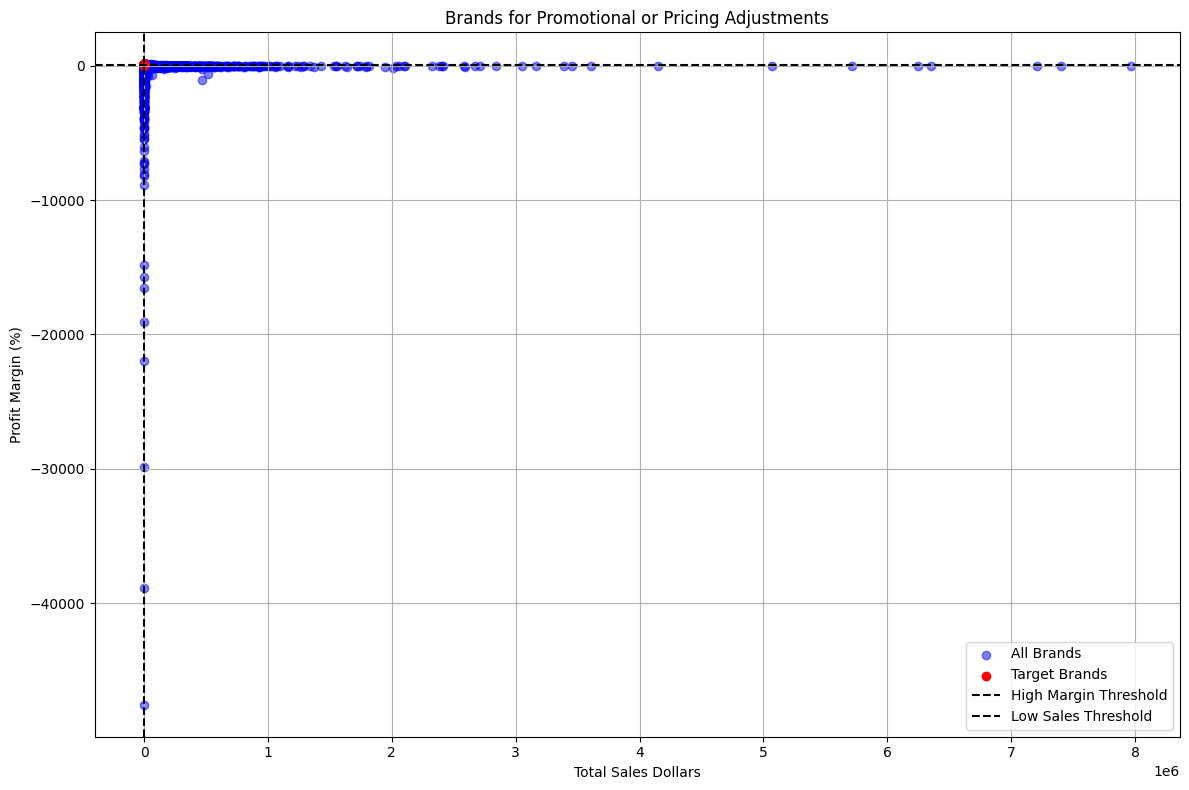

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your cleaned data
df = pd.read_csv('vendor_sales_summary.csv')

# Group by brand/description to calculate necessary metrics
brand_perf = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'
}).reset_index()

# Define thresholds
sales_threshold = 1000     # Adjust as per your case
margin_threshold = 65      # For 65% margin

# Define target brands (low sales but high margin)
target_brands = brand_perf[
    (brand_perf['TotalSalesDollars'] < sales_threshold) &
    (brand_perf['ProfitMargin'] > margin_threshold)
]

# Plotting
plt.figure(figsize=(12, 8))

# All brands in light blue
plt.scatter(brand_perf['TotalSalesDollars'], brand_perf['ProfitMargin'], 
            alpha=0.5, label='All Brands', color='blue')

# Target brands in red
plt.scatter(target_brands['TotalSalesDollars'], target_brands['ProfitMargin'],
            color='red', label='Target Brands')

# Add thresholds
plt.axhline(y=margin_threshold, color='black', linestyle='--', label='High Margin Threshold')
plt.axvline(x=sales_threshold, color='black', linestyle='--', label='Low Sales Threshold')

# Labels and title
plt.xlabel('Total Sales Dollars')
plt.ylabel('Profit Margin (%)')
plt.title('Brands for Promotional or Pricing Adjustments')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [64]:
# Filter out rows with negative or zero sales or margin
filtered = brand_perf[
    (brand_perf['TotalSalesDollars'] > 0) & 
    (brand_perf['ProfitMargin'] > 0)
]


In [65]:
# Define thresholds (adjust as per your dataset)
sales_threshold = 1000
margin_threshold = 65

# Target brands from the filtered data
target_brands = filtered[
    (filtered['TotalSalesDollars'] < sales_threshold) & 
    (filtered['ProfitMargin'] > margin_threshold)
]


In [67]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000]

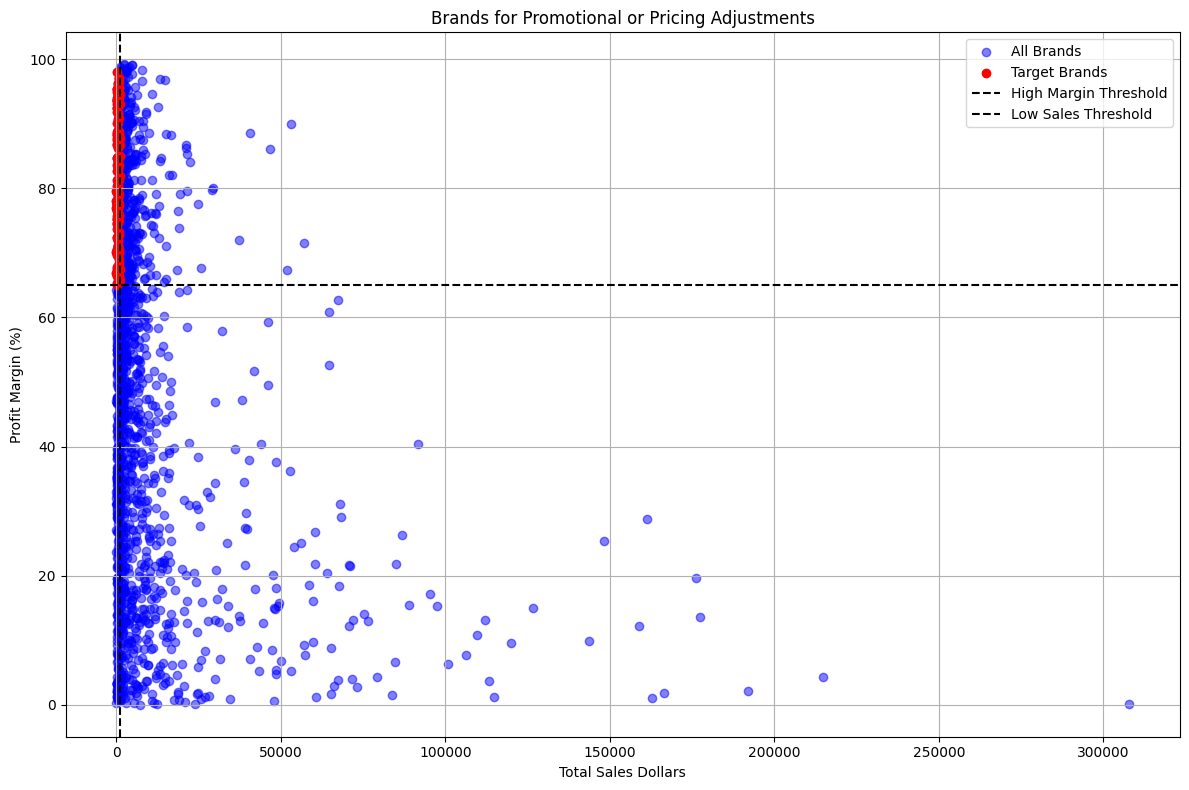

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# All valid brands
plt.scatter(filtered['TotalSalesDollars'], filtered['ProfitMargin'], 
            alpha=0.5, label='All Brands', color='blue')

# Highlighted target brands
plt.scatter(target_brands['TotalSalesDollars'], target_brands['ProfitMargin'],
            color='red', label='Target Brands')

# Threshold lines
plt.axhline(y=margin_threshold, color='black', linestyle='--', label='High Margin Threshold')
plt.axvline(x=sales_threshold, color='black', linestyle='--', label='Low Sales Threshold')

# Labels and formatting
plt.xlabel('Total Sales Dollars')
plt.ylabel('Profit Margin (%)')
plt.title('Brands for Promotional or Pricing Adjustments')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [71]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)


In [69]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors


VendorName
DIAGEO NORTH AMERICA INC      6.873983e+07
MARTIGNETTI COMPANIES         4.096012e+07
PERNOD RICARD USA             3.227954e+07
JIM BEAM BRANDS COMPANY       3.189862e+07
BACARDI USA INC               2.500537e+07
CONSTELLATION BRANDS INC      2.446713e+07
E & J GALLO WINERY            1.855377e+07
BROWN-FORMAN CORP             1.847661e+07
ULTRA BEVERAGE COMPANY LLP    1.780265e+07
M S WALKER INC                1.543607e+07
Name: TotalSalesDollars, dtype: float64

In [70]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [72]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

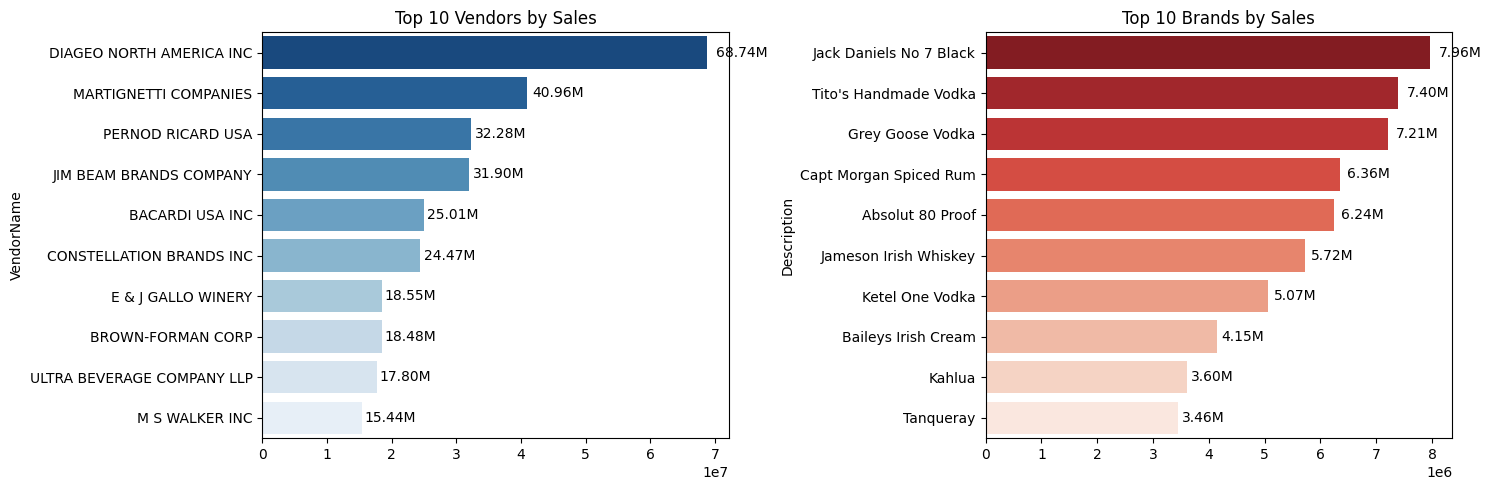

In [73]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [74]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()


In [87]:
vendor_performance['PurchaseContribution%'] = (
    vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum() * 100
).round(2)

# Sort the DataFrame by the new column
vendor_performance_sorted = vendor_performance.sort_values('PurchaseContribution%', ascending=False)

# Print the sorted DataFrame
print(vendor_performance_sorted)


                   VendorName  TotalPurchaseDollars   GrossProfit  \
28   DIAGEO NORTH AMERICA INC           50959796.85 -3.317976e+07   
63      MARTIGNETTI COMPANIES           27861690.02 -1.476326e+07   
50    JIM BEAM BRANDS COMPANY           24203151.05 -1.650768e+07   
74          PERNOD RICARD USA           24124091.56 -1.596864e+07   
8             BACARDI USA INC           17624378.72 -1.024339e+07   
..                        ...                   ...           ...   
115                  UNCORKED               2966.31 -4.841230e+03   
119       VINEYARD BRANDS LLC              10951.51 -1.757906e+04   
116        VINEDREA WINES LLC               4657.60  2.070400e+03   
112              TRUETT HURST                236.64 -4.582900e+02   
122   WALPOLE MTN VIEW WINERY               9292.31 -7.100740e+03   

     TotalSalesDollars  PurchaseContribution%  
28        6.873983e+07                  15.83  
63        4.096012e+07                   8.66  
50        3.189862e+07     

In [88]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,AAPER ALCOHOL & CHEMICAL CO,105.07,-210.14,0.0,0.00
1,ADAMBA IMPORTS INTL INC,76.77K,-85964.28000000013,67.58K,0.02
2,ALISA CARR BEVERAGES,34.95K,43.69K,113.59K,0.01
3,ALTAMAR BRANDS LLC,11.71K,-7705.5900000000665,15.71K,0.00
4,AMERICAN SPIRITS EXCHANGE,1.21K,-690.3499999999998,1.72K,0.00
5,AMERICAN VINTAGE BEVERAGE,156.36K,-122579.92999999749,190.13K,0.05
6,APPOLO VINEYARDS LLC,2.40K,-3182.4799999999996,1.62K,0.00
7,ATLANTIC IMPORTING COMPANY,41.12K,-22959.889999999483,59.27K,0.01
8,BACARDI USA INC,17.62M,-10243391.65000083,25.01M,5.48
9,BANFI PRODUCTS CORP,1.63M,-612108.1399999867,2.65M,0.51


In [89]:
# Filter out invalid or irrelevant entries
df_cleaned = df[
    (df['GrossProfit'] > 0) & 
    (df['TotalSalesDollars'] > 0) & 
    (df['TotalPurchaseDollars'] > 0)
].copy()

# Group by Vendor
vendor_performance = df_cleaned.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'TotalSalesDollars': 'sum',
    'GrossProfit': 'sum'
}).reset_index()

# Calculate Purchase Contribution %
vendor_performance['PurchaseContribution%'] = (
    vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum() * 100
).round(2)

# Format numbers for readability (optional, for display only)
vendor_performance['TotalPurchaseDollars'] = vendor_performance['TotalPurchaseDollars'] / 1_000_000  # in millions
vendor_performance['TotalSalesDollars'] = vendor_performance['TotalSalesDollars'] / 1_000_000
vendor_performance['GrossProfit'] = vendor_performance['GrossProfit'] / 1_000_000

# Sort by Purchase Contribution
vendor_performance_sorted = vendor_performance.sort_values(by='PurchaseContribution%', ascending=False)

# Display top 10
print(vendor_performance_sorted.head(10))


                    VendorName  TotalPurchaseDollars  TotalSalesDollars  \
38       MARTIGNETTI COMPANIES              1.174108           3.206346   
75  ULTRA BEVERAGE COMPANY LLP              0.446037           1.346640   
10    CONSTELLATION BRANDS INC              0.388417           0.891685   
48              PERFECTA WINES              0.247680           0.837694   
42       MOET HENNESSY USA INC              0.196624           0.479748   
36              M S WALKER INC              0.174538           0.678152   
15    DIAGEO NORTH AMERICA INC              0.164655           0.465676   
51       PINE STATE TRADING CO              0.137055           0.352686   
19          E & J GALLO WINERY              0.125736           0.292939   
3          BANFI PRODUCTS CORP              0.115253           0.261087   

    GrossProfit  PurchaseContribution%  
38     0.858131                  25.43  
75     0.454565                   9.66  
10     0.114851                   8.41  
48     0.3

In [90]:
vendor_performance_sorted.style.format({
    'TotalPurchaseDollars': '{:.2f}M',
    'TotalSalesDollars': '{:.2f}M',
    'GrossProfit': '{:.2f}M',
    'PurchaseContribution%': '{:.2f}%'
})


,VendorName,TotalPurchaseDollars,TotalSalesDollars,GrossProfit,PurchaseContribution%
38,MARTIGNETTI COMPANIES,1.17M,3.21M,0.86M,25.43%
75,ULTRA BEVERAGE COMPANY LLP,0.45M,1.35M,0.45M,9.66%
10,CONSTELLATION BRANDS INC,0.39M,0.89M,0.11M,8.41%
48,PERFECTA WINES,0.25M,0.84M,0.34M,5.37%
42,MOET HENNESSY USA INC,0.20M,0.48M,0.09M,4.26%
36,M S WALKER INC,0.17M,0.68M,0.33M,3.78%
15,DIAGEO NORTH AMERICA INC,0.16M,0.47M,0.14M,3.57%
51,PINE STATE TRADING CO,0.14M,0.35M,0.08M,2.97%
19,E & J GALLO WINERY,0.13M,0.29M,0.04M,2.72%
3,BANFI PRODUCTS CORP,0.12M,0.26M,0.03M,2.50%


In [91]:
top_vendors['Cumulative_contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_contribution%
0,AAPER ALCOHOL & CHEMICAL CO,105.07,-210.14,0.0,0.00,0.00
1,ADAMBA IMPORTS INTL INC,76.77K,-85964.28000000013,67.58K,0.02,0.02
2,ALISA CARR BEVERAGES,34.95K,43.69K,113.59K,0.01,0.03
3,ALTAMAR BRANDS LLC,11.71K,-7705.5900000000665,15.71K,0.00,0.03
4,AMERICAN SPIRITS EXCHANGE,1.21K,-690.3499999999998,1.72K,0.00,0.03
5,AMERICAN VINTAGE BEVERAGE,156.36K,-122579.92999999749,190.13K,0.05,0.08
6,APPOLO VINEYARDS LLC,2.40K,-3182.4799999999996,1.62K,0.00,0.08
7,ATLANTIC IMPORTING COMPANY,41.12K,-22959.889999999483,59.27K,0.01,0.09
8,BACARDI USA INC,17.62M,-10243391.65000083,25.01M,5.48,5.57
9,BANFI PRODUCTS CORP,1.63M,-612108.1399999867,2.65M,0.51,6.08


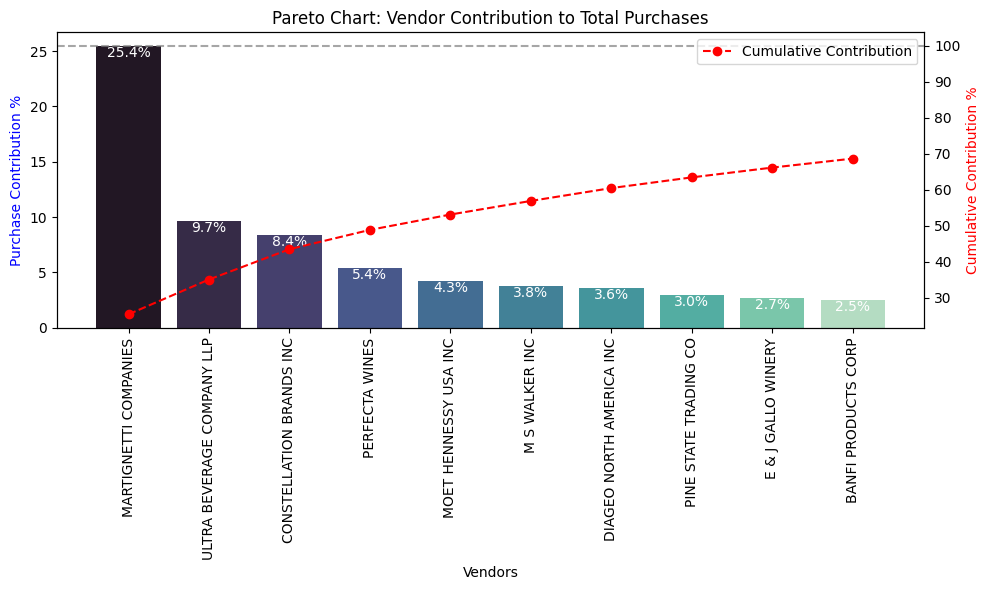

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)

# Annotate bars
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, f"{value:.1f}%", ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'],
         color='red', marker='o', linestyle='dashed', label='Cumulative Contribution')

# Axis labels and ticks
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Extra formatting
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [98]:
print(top_vendors.columns)


Index(['VendorName', 'TotalPurchaseDollars', 'TotalSalesDollars',
       'GrossProfit', 'PurchaseContribution%', 'Cumulative_Contribution%'],
      dtype='object')


In [95]:
# Filter valid vendors
valid_vendors = vendor_performance[
    (vendor_performance['TotalPurchaseDollars'] > 0)
]

# Recalculate contribution %
valid_vendors['PurchaseContribution%'] = (
    valid_vendors['TotalPurchaseDollars'] / valid_vendors['TotalPurchaseDollars'].sum() * 100
).round(2)

# Sort and calculate cumulative %
valid_vendors = valid_vendors.sort_values('PurchaseContribution%', ascending=False)
valid_vendors['Cumulative_Contribution%'] = valid_vendors['PurchaseContribution%'].cumsum().round(2)

# Select top 10 or top N vendors
top_vendors = valid_vendors.head(10)


In [101]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(), 2)} %")


Total Purchase Contribution of top 10 vendors is 68.67 %


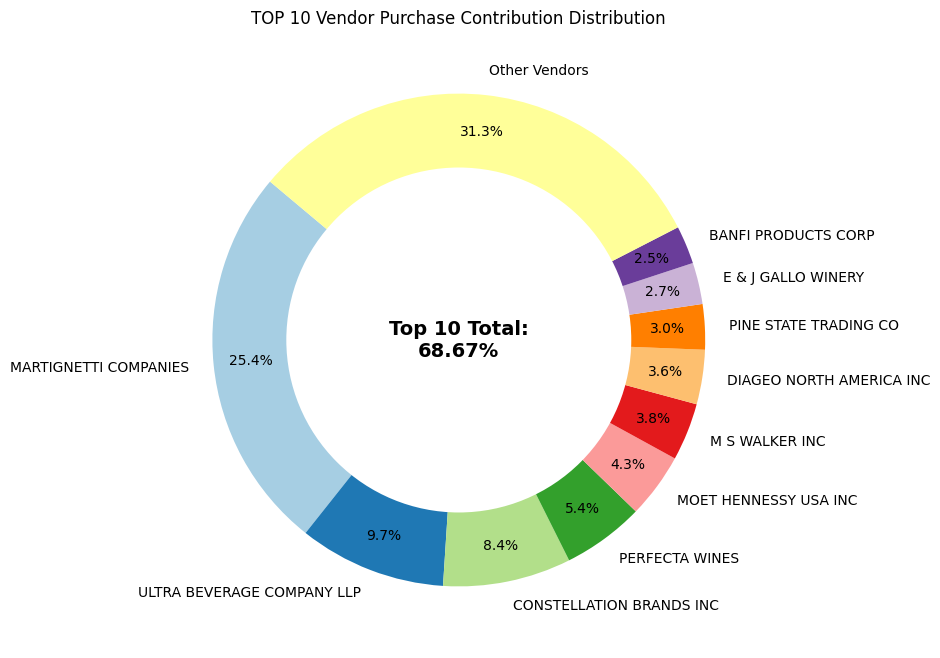

In [103]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions, labels=vendors, autopct='%1.1f%%',
    startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14,
         fontweight='bold', ha='center', va='center')
plt.title('TOP 10 Vendor Purchase Contribution Distribution')
plt.show()


Which vendor have low inventory turnover, indicating excess stock and solw-moving products?

In [7]:
import pandas as pd

# Load the data (replace with your correct file path)
df = pd.read_csv('vendor_sales_summary.csv')

# Now you can safely filter
low_stock_turnover = df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)
print(low_stock_turnover)


                               StockTurnover
VendorName                                  
AAPER ALCOHOL & CHEMICAL CO         0.000000
LAUREATE IMPORTS CO                 0.000000
TRUETT HURST                        0.041667
IRA GOLDMAN AND WILLIAMS, LLP       0.075000
HIGHLAND WINE MERCHANTS LLC         0.148920
UNCORKED                            0.217238
MILTONS DISTRIBUTING CO             0.236111
VINEYARD BRANDS LLC                 0.256241
LOYAL DOG WINERY                    0.308333
BLACK COVE BEVERAGES                0.340588


How much capital is locked unsold and which vendor contribute the most?

In [12]:
import pandas as pd

vendor_summary = pd.read_csv('vendor_sales_summary.csv')


In [13]:
vendor_summary["UnsoldInventoryValue"] = (
    vendor_summary["TotalPurchaseQuantity"] - vendor_summary["TotalSalesQuantity"]
) * vendor_summary["PurchasePrice"]

# Define the format_dollars function if not already defined
def format_dollars(x):
    return "${:,.2f}".format(x)

print('Total Unsold Capital:', format_dollars(vendor_summary["UnsoldInventoryValue"].sum()))


Total Unsold Capital: $8,748,929.54


In [14]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor["UnsoldInventoryValue"] = inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
28,DIAGEO NORTH AMERICA INC,"$980,085.87"
63,MARTIGNETTI COMPANIES,"$928,987.31"
50,JIM BEAM BRANDS COMPANY,"$857,795.51"
114,ULTRA BEVERAGE COMPANY LLP,"$780,266.12"
73,PERFECTA WINES,"$571,806.73"
74,PERNOD RICARD USA,"$554,740.67"
59,M S WALKER INC,"$469,962.96"
125,WILLIAM GRANT & SONS INC,"$436,492.34"
33,E & J GALLO WINERY,"$315,202.46"
14,BROWN-FORMAN CORP,"$284,906.60"


what is 95% confidence intervals for profit margins of top-performing andlow-performing?

In [17]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('vendor_sales_summary.csv')

# Recalculate ProfitMargin safely
df["ProfitMargin"] = (df["TotalSalesDollars"] - df["TotalPurchaseDollars"]) / df["TotalSalesDollars"]

# Clean up infinite values and drop NaNs
df["ProfitMargin"].replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=["ProfitMargin"], inplace=True)

# Calculate thresholds
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# Filter
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"]
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"]

# Display
print("Top Vendors ProfitMargins:")
print(top_vendors.describe())

print("\nLow Vendors ProfitMargins:")
print(low_vendors.describe())


Top Vendors ProfitMargins:
count    2629.000000
mean        0.300026
std         0.134356
min        -0.594594
25%         0.244624
50%         0.306305
75%         0.366857
max         0.950125
Name: ProfitMargin, dtype: float64

Low Vendors ProfitMargins:
count    2630.000000
mean       -1.359673
std         8.753692
min      -237.306390
25%        -0.524527
50%         0.206342
75%         0.350416
max         0.991661
Name: ProfitMargin, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20384\1116138592.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ProfitMargin"].replace([np.inf, -np.inf], np.nan, inplace=True)


In [16]:
import numpy as np

# Replace inf, -inf with NaN, then drop or fill as needed
df["ProfitMargin"].replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=["ProfitMargin"], inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20384\2239034595.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ProfitMargin"].replace([np.inf, -np.inf], np.nan, inplace=True)


In [18]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors 95% CI: (0.29, 0.31), Mean: 0.30
Low Vendors 95% CI: (-1.69, -1.02), Mean: -1.36


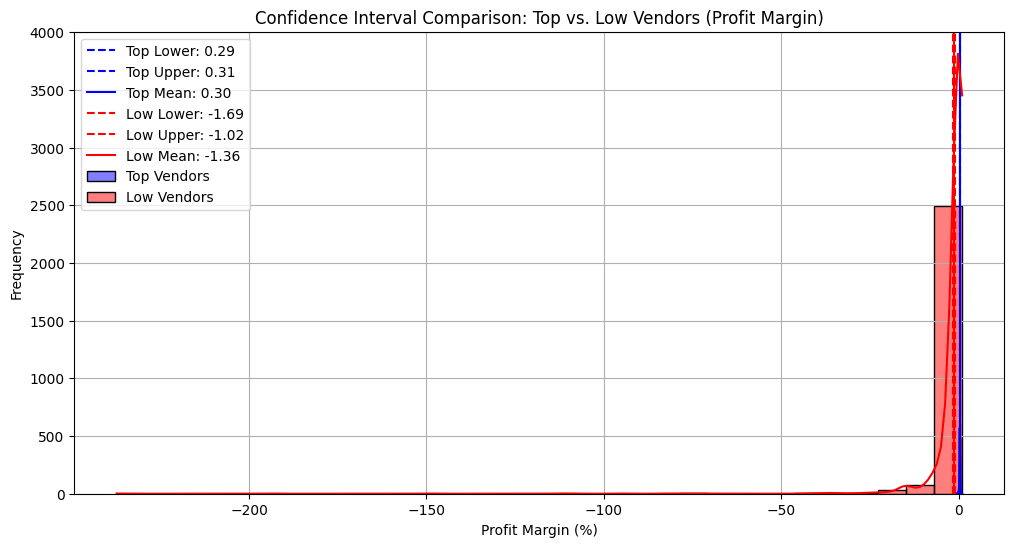

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # ← This is the missing import


top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# Print Confidence Intervals
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")
# Set plot size
plt.figure(figsize=(12, 6))

# ---------------------
# Top Vendors Plot
# ---------------------
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# ---------------------
# Low Vendors Plot
# ---------------------
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# ---------------------
# Finalize Plot
# ---------------------
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


Top Vendors Profit Margins:
 count    2454.000000
mean        0.301618
std         0.128297
min        -0.511448
25%         0.245404
50%         0.304732
75%         0.366844
max         0.950125
Name: ProfitMargin, dtype: float64

Low Vendors Profit Margins:
 count    2454.000000
mean        0.233843
std         0.406246
min        -0.999762
25%         0.041354
50%         0.310270
75%         0.428511
max         0.991661
Name: ProfitMargin, dtype: float64


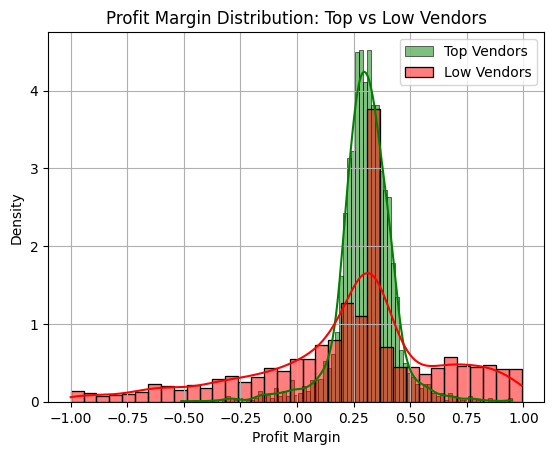

In [24]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('vendor_sales_summary.csv')

# STEP 1: Filter out rows where TotalSalesDollars is 0 or NaN
df = df[df["TotalSalesDollars"] > 0]

# STEP 2: Calculate profit margin correctly
df["ProfitMargin"] = (df["TotalSalesDollars"] - df["TotalPurchaseDollars"]) / df["TotalSalesDollars"]

# STEP 3: Remove rows with extreme or NaN profit margins
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=["ProfitMargin"])
df = df[df["ProfitMargin"].between(-1, 1)]  # Optional: restrict margin to -100% to +100%

# STEP 4: Define Top and Low vendors by 75th and 25th percentile of TotalSalesDollars
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# STEP 5: Split data
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"]
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"]

# STEP 6: Print summaries
print("Top Vendors Profit Margins:\n", top_vendors.describe())
print("\nLow Vendors Profit Margins:\n", low_vendors.describe())

# Optional: Plot distributions
sns.histplot(top_vendors, kde=True, color='green', label='Top Vendors', stat='density')
sns.histplot(low_vendors, kde=True, color='red', label='Low Vendors', stat='density')
plt.legend()
plt.title("Profit Margin Distribution: Top vs Low Vendors")
plt.xlabel("Profit Margin")
plt.ylabel("Density")
plt.grid(True)
plt.show()


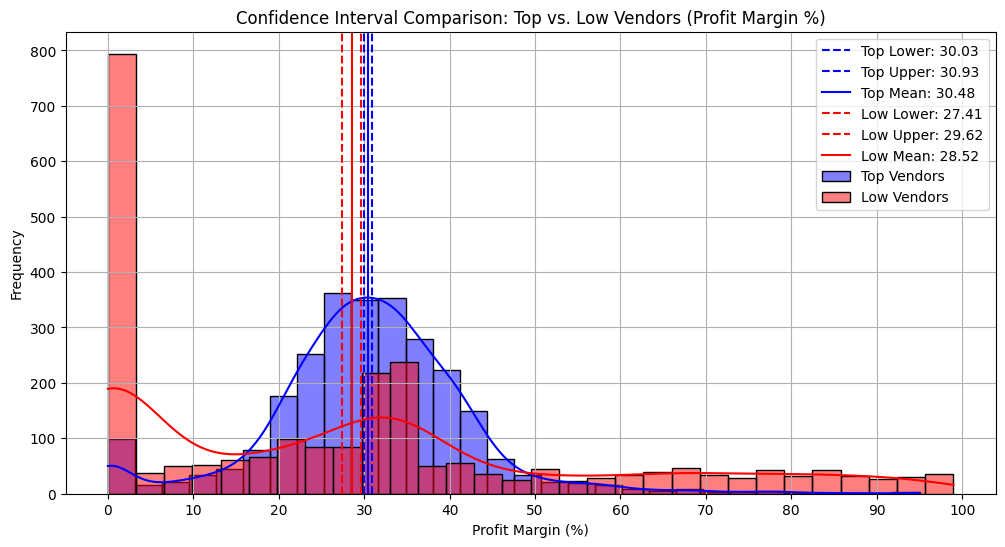

In [37]:
# Scale to percentage
top_vendors = top_vendors * 100
low_vendors = low_vendors * 100

# Clip to clean range
top_vendors = top_vendors.clip(0, 100)
low_vendors = low_vendors.clip(0, 100)

# Recalculate confidence intervals in percentage
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin %)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.xticks(np.arange(0, 101, 10))  # To match teacher’s x-axis
plt.legend()
plt.grid(True)
plt.show()


In [39]:
df.to_csv("vendor_sales_summary_cleaned.csv", index=False)
